In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales(1).csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
df['price'] = df['price'].astype(str)

In [7]:
df['price'] = df['price'].str.replace('$', '')

In [8]:
df['price'] = df['price'].astype(float)

In [9]:
df['line_total'] = df['line_total'].astype(str)

In [10]:
df['line_total'] = df['line_total'].str.replace('$', '')

In [11]:
df['line_total'] = df['line_total'].astype(float)

In [12]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [13]:
df[df.duplicated()].shape[0]

538

In [14]:
df = df.drop_duplicates()

In [15]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [16]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [17]:
df.dropna(axis=0).head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0


#### Sanity check for value ranges and to check assumptions

In [18]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [19]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different.

Then remove if line total < 0

In [20]:
df['line_total'] = df['price'] * df['quantity']

In [21]:
df_negative_price = df[df['line_total'] < 0]

In [22]:
df = df.drop(df_negative_price.index, axis=0)

In [23]:
df.describe()

,order_id,ordered_at,price,quantity,line_total
count,29105.000000,29105,29105.000000,29105.000000,29105.000000
mean,14995.744820,2018-04-15 12:39:46.620099840,2.512730,2.001031,5.030665
min,10000.000000,2018-01-01 11:30:00,0.500000,1.000000,0.500000
25%,12505.000000,2018-02-23 07:35:56,1.500000,1.000000,2.500000
50%,14979.000000,2018-04-14 17:45:06,2.500000,2.000000,4.500000
75%,17507.000000,2018-06-07 00:48:22,3.500000,3.000000,7.500000
max,19999.000000,2018-07-28 18:51:57,4.000000,3.000000,12.000000
std,2888.342601,NaN,1.059923,0.819464,3.085340


#### TODO: Get value between "" in name and put it in category column

In [24]:
df = df.assign(Category = df['name'])

In [25]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,Category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,"""ICE CREAM"" Peanut Fudge"
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,"""ICE CREAM"" Peanut Fudge"
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,"""SORBET"" Raspberry"
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5,NaN
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,"""CONE"" Dipped Waffle Cone"


#### Analysis, finally!

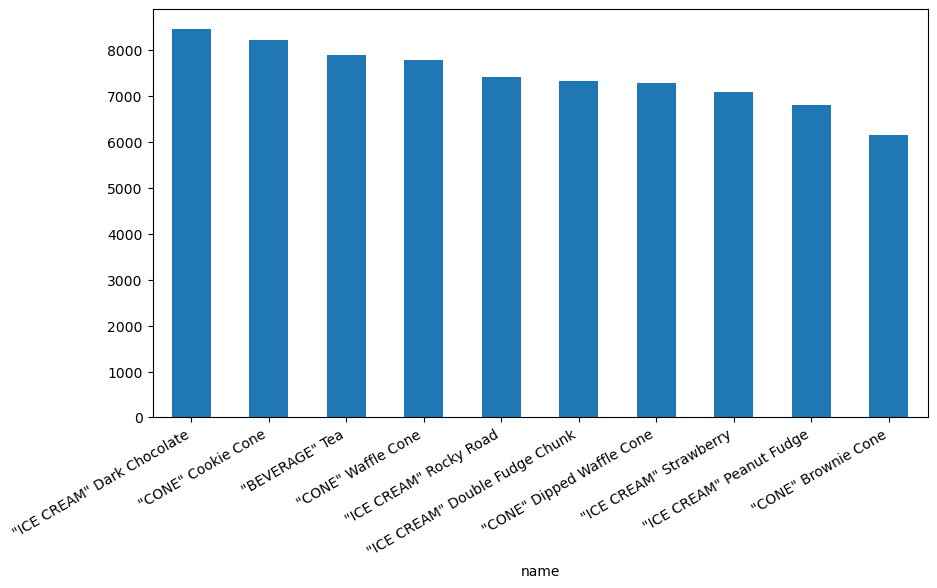

In [26]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()